In [1]:
from langchain_community.tools import DuckDuckGoSearchRun
duckduckgo_search_run = DuckDuckGoSearchRun()
duckduckgo_search_run.invoke("What is the weather in yangon")

D:\anaconda3\Lib\asyncio\events.py:88: UserWarning: lxml is not installed. Using backend='api'.
  self._context.run(self._callback, *self._args)


"Currently, in Yangon, cloudy skies continue to dominate, with no clear breaks in sight. The temperature is a warm 26°C, the feels-like temperature, which combines air temperature and relative humidity, registers as assessed at a tropical 31°C.The current temperature is only a few degrees off the maximum of 29°C for today. Yangon Weather Forecasts. Weather Underground provides local & long-range weather forecasts, weatherreports, maps & tropical weather conditions for the Yangon area. The temperature in Yangon today in the early morning is 27 ° C. If you take into account factors such as wind, humidity and other weather conditions, the temperatures can feel like 30 ° C. The chance of rain in Yangon in the morning is 0%, and the wind will blow at 10 km/h. Today's Weather - Yangon, MMR. May 3, 2025 10:35 AM YANGON INTL MYAN . 88° Feels Like 100° Hi 90°F Lo 77°F. Partly Cloudy. Live Radar. Weather Details. Windchill 86ºF Daily Rain--Dewpoint 75ºF Monthly Rain-- Humidity 70% Avg. Wind SSW 

In [2]:
from langchain_community.utilities import OpenWeatherMapAPIWrapper
import os

weather_search = OpenWeatherMapAPIWrapper()
weather_search.run("Yangon, Myanmar")

'In Yangon, Myanmar, the current weather is as follows:\nDetailed status: few clouds\nWind speed: 5.14 m/s, direction: 260°\nHumidity: 52%\nTemperature: \n  - Current: 34.98°C\n  - High: 34.98°C\n  - Low: 34.98°C\n  - Feels like: 41.43°C\nRain: {}\nHeat index: None\nCloud cover: 20%'

In [3]:
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
from langchain_groq import ChatGroq
model = ChatGroq(model_name= "deepseek-r1-distill-llama-70b")

In [5]:

from langchain_core.tools import tool
import warnings
@tool
def duckduckgo_search(query: str) -> str:
    """Search Latest Weather News in Myanmar in DuckDuckGo and return including Location"""
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return DuckDuckGoSearchRun(query=query, source="news").invoke(query)

@tool
def weather_search(city: str, country: str) -> str:
    """Retrieve the weather information for a specific city and country"""
    weather_search = OpenWeatherMapAPIWrapper()
    return weather_search.run(f"{city}, {country}")

tools = [duckduckgo_search, weather_search]
tools

[StructuredTool(name='duckduckgo_search', description='Search Latest Weather News in Myanmar in DuckDuckGo and return including Location', args_schema=<class 'langchain_core.utils.pydantic.duckduckgo_search'>, func=<function duckduckgo_search at 0x000002BCD2A8DC60>),
 StructuredTool(name='weather_search', description='Retrieve the weather information for a specific city and country', args_schema=<class 'langchain_core.utils.pydantic.weather_search'>, func=<function weather_search at 0x000002BCD2A8DD00>)]

In [6]:
model_with_tools = model.bind_tools(tools)
model_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002BCD07602F0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002BCD2A91640>, model_name='deepseek-r1-distill-llama-70b', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'duckduckgo_search', 'description': 'Search Latest Weather News in Myanmar in DuckDuckGo and return including Location', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'weather_search', 'description': 'Retrieve the weather information for a specific city and country', 'parameters': {'properties': {'city': {'type': 'string'}, 'country': {'type': 'string'}}, 'required': ['city', 'country'], 'type': 'object'}}}]}, config={}, config_factories=[])

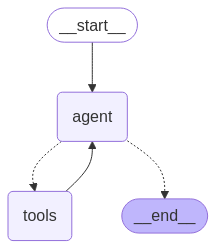

In [7]:
from langgraph.prebuilt import create_react_agent

system_prompt = """Act as a helpful assistant.
Use the tools at your disposal to perform tasks as needed.
    -duckduckgo_search: use this tool for CURRENT NEWS in Myanmar including LOCATION and MAGNITUDE.
Use the tools if you do not know answer.
"""
agent = create_react_agent(model=model, tools=tools, state_modifier= system_prompt)
agent

In [8]:
from datetime import datetime

inputs = {"messages": [("user", f"Earthquake news in Myanmar: {datetime.now().strftime("%d:%m:%y")}, including Latitude and Longitude")]}
#weather_input = {"messages": [('user', "Next 2 days weather in Yangon Myanmar")]}

result = agent.invoke(inputs, stream_mode="values")

In [9]:
result

{'messages': [HumanMessage(content='Earthquake news in Myanmar: 06:05:25, including Latitude and Longitude', additional_kwargs={}, response_metadata={}, id='dfec2273-eb38-4a5b-8efa-8ec396d3460c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tzh6', 'function': {'arguments': '{"query":"earthquake in Myanmar latest news location magnitude"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 334, 'prompt_tokens': 245, 'total_tokens': 579, 'completion_time': 1.221467251, 'prompt_time': 0.016768606, 'queue_time': 0.205355157, 'total_time': 1.238235857}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-49100122-9d29-40d0-9453-3697fa1a8fe9-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'earthquake in Myanmar latest news location magnitude'}, 'id': 'call_tzh6', 'type': 'tool_call'}], usage_metadata=

In [10]:
final = result['messages'][-1].content
final

'Here is the latest information about the earthquake in Myanmar:\n\n- **Date and Time**: March 28, 2025, at 12:50 PM (Yangon time)\n- **Magnitude**: 7.7\n- **Location**: 11 miles west of Mandalay\n- **Impact**: The earthquake caused significant damage and loss of life, with over 1,600 people killed and thousands injured in Myanmar. The tremors were also felt in neighboring countries such as Thailand and southwestern China.\n\nThis information is based on the latest reports available.'

In [2]:
final = "Here is the latest news about earthquakes in Myanmar, including their locations and magnitudes:\n\n1. **Earthquake in Mae Hong Son's Pai District**  \n   - **Magnitude**: 1.8  \n   - **Location**: Tambon Mae Na Toeng, Pai District  \n   - **Epicentre**: 1 kilometre deep  \n   - **Time**: 9:42 AM  \n\n2. **Earthquake in Myanmar (Sagaing Region)**  \n   - **Magnitude**: 5.9  \n   - **Depth**: 10 kilometres  \n   - **Epicentre**: Latitude 21.065° North, Longitude 96...  \n   - **Time**: 9:24 AM (Thailand time)  \n\n3. **Earthquake near Sagaing**  \n   - **Magnitude**: Unspecified  \n   - **Depth**: 10 kilometres  \n   - **Epicentre**: Latitude 21.93° N, Longitude 96.07° E  \n   - **Time**: 11:50 AM (local time)  \n\n4. **Strong Earthquake in Mandalay Region**  \n   - **Magnitude**: 7.7 Richter Scale  \n   - **Epicentre**: 20 kilometres northeast of Mandalay  \n   - **Location**: Latitude 22.09°N, Longitude 96.23°E  \n   - **Depth**: 10 kilometres  \n\n5. **Earthquake near Mingin**  \n   - **Magnitude**: 3.5 Richter Scale  \n   - **Epicentre**: 27 miles northeast of Mingin  \n   - **Location**: Latitude 22.96°N, Longitude 94.74°E  \n   - **Depth**: 28 kilometres  \n   - **Time**: 11:06:47 M.S.T on April 14, 2025  \n\nLet me know if you'd like more details!"


In [3]:
import re 

pattern = r"Latitude\s([\d.]+°\s?[Nn]?),\s*Longitude\s([\d.]+°\s?[Ee]?)"

matches = re.findall(pattern, final)
matches

[('21.93° N', '96.07° E'), ('22.09°N', '96.23°E'), ('22.96°N', '94.74°E')]

In [4]:
for lat, lon in matches:
    print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: 21.93° N, Longitude: 96.07° E
Latitude: 22.09°N, Longitude: 96.23°E
Latitude: 22.96°N, Longitude: 94.74°E


In [5]:
import folium
import webbrowser

coordinates = []
for lat, lon in matches:
    try:
        clean_lat = float(re.sub(r"[^\d.]", "", lat))
        clean_lon = float(re.sub(r"[^\d.]", "", lon))
        coordinates.append((clean_lat, clean_lon))
    except ValueError:
        print(f"Skipping invalid coordinates: {lat}, {lon}")

In [6]:
coordinates

[(21.93, 96.07), (22.09, 96.23), (22.96, 94.74)]

In [9]:
folium_map = folium.Map()

for coords in coordinates:
    folium.Marker(location=[coords[0], coords[1]]).add_to(folium_map)


In [11]:
import webbrowser
folium_map.save("FoliumMap.html")
webbrowser.open("FoliumMap.html")


True